In [1]:
import pandas as pd
print('pandas:', pd.__version__)

# removing warning
pd.options.mode.chained_assignment = None  # default='warn'

import numpy as np
import sklearn 
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras
print('tf:', tf.__version__)
print('keras:', keras.__version__)

from keras.models import Sequential
from keras.layers import Dense

pandas: 1.2.4
tf: 2.3.0
keras: 2.4.3


In [18]:
# Genuine users dataset
# ************** Genuine users - cresci2017 ****************
gen_users = pd.read_csv('datasets\\genuine_accounts\\users.csv') # from cresci2018
print(gen_users.info())

# deleting deprecated API features 
gen_users= gen_users.drop(gen_users.columns[[9,10,14,15,17,18,19,21,22,23,24,25,26,27,28,29,32,34,35,36,38,39,40,41]], axis=1)

# show info
# print(gen_users.info())
#print(gen_users.head()) # first 5 rows
#print(gen_users.shape)

#print(gen_users.iat[0,1]) # acces a certain element - same way: gen_users.at[0,'name']
#print(gen_users.iloc[2]) # access a certain row

# Features for input matrix
gen_users_X = gen_users.iloc[:,[3,4,5,6,7,8,9,10,11,14,15,16]]

# Binarize certain features: 0 = no, 1= yes; e.g., do they have url? yes/no
inds = [8, 9, 10, 11, 14, 15, 16]

for i in range(len(inds)) :
    gen_users_X.iloc[:,5+i] = gen_users.iloc[:,inds[i]].notnull().astype(int)
    
# adding Y-column, i.e., the label. 0 = real user - 1 = fake user
gen_users_X['label'] = 0

# ************** Genuine users - cresci2015 - The Fake Project ****************
gen_users2 = pd.read_csv('datasets\\TFP\\users.csv') # from cresci2015 - The Fake Project

# deleting deprecated API features 
gen_users2= gen_users2.drop(gen_users2.columns[[10, 11, 15, 16, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 32, 33]], axis=1)

# Features for input matrix
gen_users_X2 = gen_users2.iloc[:,[3,4,5,6,7,9,10,11,12,15,16,17]]

# Binarize certain features: 0 = no, 1= yes; e.g., do they have url? yes/no
inds = [9,10,11,12,15,16,17]

for i in range(len(inds)) :
    gen_users_X2.iloc[:,5+i] = gen_users2.iloc[:,inds[i]].notnull().astype(int)
    
# adding Y-column, i.e., the label. 0 = real user - 1 = fake user
gen_users_X2['label'] = 0

# ************** Genuine users - cresci2015 - E13 Elezioni ****************
gen_users3 = pd.read_csv('datasets\\E13\\users.csv') # from cresci2015 - The Fake Project

# deleting deprecated API features 
gen_users3= gen_users3.drop(gen_users3.columns[[10, 11, 15, 16, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 32, 33]], axis=1)

# Features for input matrix
gen_users_X3 = gen_users3.iloc[:,[3,4,5,6,7,9,10,11,12,15,16,17]]

# Binarize certain features: 0 = no, 1= yes; e.g., do they have url? yes/no
inds = [9,10,11,12,15,16,17]

for i in range(len(inds)) :
    gen_users_X3.iloc[:,5+i] = gen_users3.iloc[:,inds[i]].notnull().astype(int)
    
# adding Y-column, i.e., the label. 0 = real user - 1 = fake user
gen_users_X3['label'] = 0

gen_users_X3

# ************ combining all fake datasets ***************
gen_users_X_all = pd.concat([gen_users_X, gen_users_X2, gen_users_X3])

## ****************** selecting meaningful features ******************
gen_users_X_all_imp = gen_users_X_all[['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'description', 'label']]

gen_users_X_all_imp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3474 entries, 0 to 3473
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  3474 non-null   int64  
 1   name                                3473 non-null   object 
 2   screen_name                         3474 non-null   object 
 3   statuses_count                      3474 non-null   int64  
 4   followers_count                     3474 non-null   int64  
 5   friends_count                       3474 non-null   int64  
 6   favourites_count                    3474 non-null   int64  
 7   listed_count                        3474 non-null   int64  
 8   url                                 1266 non-null   object 
 9   lang                                3474 non-null   object 
 10  time_zone                           2475 non-null   object 
 11  location                            2365 no

,statuses_count,followers_count,friends_count,favourites_count,description,label
0,2177,208,332,265,1,0
1,2660,330,485,3972,1,0
2,1254,166,177,1185,1,0
3,202968,2248,981,60304,1,0
4,82,21,79,5,1,0
...,...,...,...,...,...,...
1476,49,208,124,14,1,0
1477,66,22,55,0,1,0
1478,4,0,4,3,1,0
1479,3,2,4,0,1,0


In [3]:
# Spambot users dataset
# ************** spambots 2 - cresci2017 ****************
bot_users = pd.read_csv('datasets\\social_spambots_2\\users.csv')   

# deleting not needed columns
bot_users= bot_users.drop(bot_users.columns[[9,10,14,15,17,18,19,21,22,23,24,25,26,27,28,29,32,34,35,36,38,39]], axis=1)

# Features for input matrix
bot_users_X = bot_users.iloc[:,[3,4,5,6,7,8,9,10,11,14,15,16]]

# Binarize certain features: 0 = no, 1= yes; e.g., do they have url? yes/no
inds = [8, 9, 10, 11, 14, 15, 16]

for i in range(len(inds)) :
    bot_users_X.iloc[:,5+i] = bot_users.iloc[:,inds[i]].notnull().astype(int)
    
# adding Y-column, i.e., the label. 0 = real user - 1 = fake user
bot_users_X['label'] = 1

# ************** spambots 1 - cresci2017 ****************
bot_users2 = pd.read_csv('datasets\\social_spambots_1\\users.csv')   

# deleting not needed columns
bot_users2 = bot_users2.drop(bot_users2.columns[[9,10,14,15,17,18,19,21,22,23,24,25,26,27,28,29,32,34,35,36,38,39,40]], axis=1)

# Features for input matrix
bot_users_X2 = bot_users2.iloc[:,[3,4,5,6,7,8,9,10,11,14,15,16]]

# Binarize certain features: 0 = no, 1= yes; e.g., do they have url? yes/no
inds = [8, 9, 10, 11, 14, 15, 16]

for i in range(len(inds)) :
    bot_users_X2.iloc[:,5+i] = bot_users2.iloc[:,inds[i]].notnull().astype(int)
    
# adding Y-column, i.e., the label. 0 = real user - 1 = fake user
bot_users_X2['label'] = 1

# ************** spambots 3 - cresci2017 ****************
bot_users3 = pd.read_csv('datasets\\social_spambots_3\\users.csv')   

# deleting not needed columns
bot_users3 = bot_users3.drop(bot_users3.columns[[9,10,14,15,17,18,19,21,22,23,24,25,26,27,28,29,32,34,35,36,38,39,40]], axis=1)

# Features for input matrix
bot_users_X3 = bot_users3.iloc[:,[3,4,5,6,7,8,9,10,11,14,15,16]]

# Binarize certain features: 0 = no, 1= yes; e.g., do they have url? yes/no
inds = [8, 9, 10, 11, 14, 15, 16]

for i in range(len(inds)) :
    bot_users_X3.iloc[:,5+i] = bot_users3.iloc[:,inds[i]].notnull().astype(int)
    
# adding Y-column, i.e., the label. 0 = real user - 1 = fake user
bot_users_X3['label'] = 1

# ************** spambots 4 - TWT - cresci2015 ****************
bot_users4 = pd.read_csv('datasets\\TWT\\users.csv')   

# deleting not needed columns
bot_users4 = bot_users4.drop(bot_users4.columns[[8, 10, 11, 15, 16, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 32, 33]], axis=1)

# Features for input matrix
bot_users_X4 = bot_users4.iloc[:,[3,4,5,6,7,8,9,10,11,14,15,16]]

# Binarize certain features: 0 = no, 1= yes; e.g., do they have url? yes/no
inds = [8, 9, 10, 11, 14, 15, 16]

for i in range(len(inds)) :
    bot_users_X4.iloc[:,5+i] = bot_users4.iloc[:,inds[i]].notnull().astype(int)
    
# adding Y-column, i.e., the label. 0 = real user - 1 = fake user
bot_users_X4['label'] = 1

# ************ combining all fake datasets *************
bot_users_X_all = pd.concat([bot_users_X, bot_users_X2, bot_users_X3, bot_users_X4])

## ****************** selecting meaningful features ******************
bot_users_X_all_imp = bot_users_X_all[['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'description', 'label']]

bot_users_X_all_imp

,statuses_count,followers_count,friends_count,favourites_count,description,label
0,53,10,46,0,0,1
1,68,4,40,0,0,1
2,79,9,39,0,0,1
3,59,1,39,0,0,1
4,73,7,36,0,0,1
...,...,...,...,...,...,...
840,1,2,325,0,0,1
841,6,2,307,4,1,1
842,1,2,314,0,0,1
843,5,6,482,0,1,1


In [33]:
# ************** cresci2019 ****************
bot_users = pd.read_csv('datasets\\gilani-2017.tsv', sep='\t')   

# bot_users.info()

# print(gen_users.tail()) # first 5 rows
print(bot_users.shape)

print(bot_users.iat[0,0]) # acces a certain element - same way: gen_users.at[0,'name']
# print(bot_users.iloc[0]) 

# deleting not needed columns
# bot_users= bot_users.drop(bot_users.columns[[9,10,14,15,17,18,19,21,22,23,24,25,26,27,28,29,32,34,35,36,38,39]], axis=1)

# # Features for input matrix
# bot_users_X = bot_users.iloc[:,[3,4,5,6,7,8,9,10,11,14,15,16]]

# # Binarize certain features: 0 = no, 1= yes; e.g., do they have url? yes/no
# inds = [8, 9, 10, 11, 14, 15, 16]

# for i in range(len(inds)) :
#     bot_users_X.iloc[:,5+i] = bot_users.iloc[:,inds[i]].notnull().astype(int)
    
# # adding Y-column, i.e., the label. 0 = real user - 1 = fake user
# bot_users_X['label'] = 1

(2651, 2)
808280162


X shape: (11181, 12)
Y shape: (11181, 1)
Training data samples: 8385
Testing data samples: 2796
263/263 [==============================] - 0s 991us/step - loss: 0.1634 - accuracy: 0.9221
Training Accuracy: 92.21
Test Accuracy is: 91.48783977110158


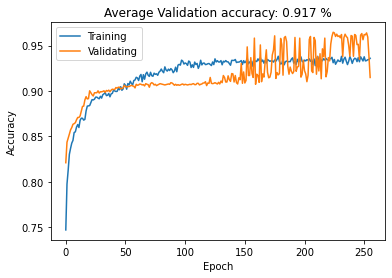

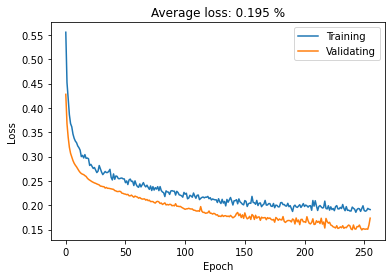

In [8]:
# Dataset preparation
importance = False

# combining both datasets
if importance:
    dataset = pd.concat([gen_users_X_all_imp , bot_users_X_all_imp])
    X = dataset.iloc[:,0:5].values      #using .values, transform to numpy array. If not, pandas df
    Y = dataset.iloc[:,5:6].values
else:
    dataset = pd.concat([gen_users_X_all , bot_users_X_all])
    X = dataset.iloc[:,0:12].values      #using .values, transform to numpy array. If not, pandas df
    Y = dataset.iloc[:,12:13].values

print('X shape:',X.shape)
print('Y shape:',Y.shape)

# normalization 
X = StandardScaler().fit_transform(X)

# hot-encoding is needed if more than 1 class - not this case

# splitting - 80/20 -> training/testing
#from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25)
print('Training data samples:',len(X_train))
print('Testing data samples:',len(X_test))

# ANN architecture
model = Sequential()
model.add(Dense(16, input_dim=12, activation='relu'))   # 96% acc when 16/8 neurons  # change input_dim if importance = True
model.add(keras.layers.Dropout(0.25))

model.add(Dense(8, activation='relu'))
model.add(keras.layers.Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))    # 'softmax' for multi-class
#print(model.summary())

# compiling keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# training
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=256, verbose=0, batch_size=64, shuffle=True)

# Performance evaluation 
_,train_accuracy = model.evaluate(X_train, Y_train)
print('Training Accuracy: %.2f' % (train_accuracy*100))

# make class predictions with the model
Y_pred = (model.predict(X_test) > 0.5).astype(int)

# print example
# for i in range(5):
#     print('%d (expected %d)' % (Y_pred[i], Y_test[i]))
    
#from sklearn.metrics import accuracy_score
print('Test Accuracy is:', accuracy_score(Y_pred,Y_test)*100)

# Graphical evaluation
graphics= True
store = False

if graphics:

    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Average Validation accuracy: '+ str(round(np.mean(history.history['val_accuracy']),3 ) ) + ' %')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validating'], loc='best')  
    if store:
        plt.savefig('figures\\val_acc.png', format='png')

    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Average loss: '+ str(round(np.mean(history.history['val_loss']),3 ) ) + ' %')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validating'], loc='best')    
    if store:
        plt.savefig('figures\\val_loss.png', format='png')

In [6]:
# Performance Evaluation loop
ann_acc_av = 0
its = 100

for i in range(its):
    
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)
    print('Training data samples:',len(X_train))
    print('Testing data samples:',len(X_test))

    # training
    history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=100, verbose=0, batch_size=64, shuffle=True)   

    # make class predictions with the model
    Y_pred = (model.predict(X_test) > 0.5).astype(int)
    ann_score = accuracy_score(Y_pred,Y_test)*100

    ann_acc_av = ann_acc_av + ann_score
    print('iter:',i)

ann_acc_av = ann_acc_av/its

print('ann_acc_av:', ann_acc_av)

Training data samples: 7826
Testing data samples: 3355
iter: 0
Training data samples: 7826
Testing data samples: 3355
iter: 1
Training data samples: 7826
Testing data samples: 3355
iter: 2
Training data samples: 7826
Testing data samples: 3355
iter: 3
Training data samples: 7826
Testing data samples: 3355
iter: 4
Training data samples: 7826
Testing data samples: 3355
iter: 5
Training data samples: 7826
Testing data samples: 3355
iter: 6
Training data samples: 7826
Testing data samples: 3355
iter: 7
Training data samples: 7826
Testing data samples: 3355
iter: 8
Training data samples: 7826
Testing data samples: 3355
iter: 9
Training data samples: 7826
Testing data samples: 3355
iter: 10
Training data samples: 7826
Testing data samples: 3355
iter: 11
Training data samples: 7826
Testing data samples: 3355
iter: 12
Training data samples: 7826
Testing data samples: 3355
iter: 13
Training data samples: 7826
Testing data samples: 3355
iter: 14
Training data samples: 7826
Testing data samples: 

In [147]:
# # Genuine content (tweets) dataset
# gen_content = pd.read_csv('datasets\\genuine_accounts\\tweets.csv')

# # deleting deprecated API features
# gen_content= gen_content.drop(gen_content.columns[[3,9,11,22,23,24]], axis=1)

# # Spambot content (Tweets) dataset
# bot_content = pd.read_csv('datasets\\social_spambots_1\\tweets.csv')

# # deleting deprecated API features
# bot_content= bot_content.drop(bot_content.columns[[3,9,11,22,23,24]], axis=1)

# # show info
# print('gen_content shape:', gen_content.shape)
# print('bot_content shape: ', bot_content.shape)
